In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Guassian Mixture Model(GMM)
This is used for approximating the density(histogram) of a data set with several Normal Distributions

Questions:
1. How is this different from using generating a PDF
    - You can use it to e

# Activity

Fit a GMM to a given data sample

In [10]:
from sklearn import mixture

In [6]:
# np.random.normal(mean, variance, num_samples)
x1 = np.random.normal(-5, 1, 3000)
x2 = np.random.normal(2, 3, 7000)
x = np.concatenate((x1, x2))

In [7]:
x

array([-4.49061408, -6.53132592, -4.39311161, ..., -1.30676172,
       -0.14290351,  7.08577431])

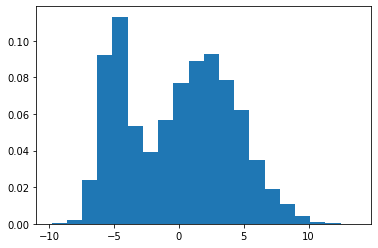

In [8]:
_= plt.hist(x, bins=20, density=1)

We see that there are two peaks, and now we want to approximate this PDF with 2 GMM models

In [12]:
gmm = mixture.GaussianMixture(n_components=2)
_= gmm.fit(x.reshape(-1,1))

In [13]:
print(f"GMM Means: {gmm.means_}")
print(f"GMM Covariances: {gmm.covariances_}")
print(f"GMM Weights: {gmm.weights_}")

GMM Means: [[ 2.12302091]
 [-4.93328441]]
GMM Covariances: [[[8.25544892]]

 [[1.11834432]]]
GMM Weights: [0.68276765 0.31723235]


The GMM weights give you how much percent is in each normal distribution

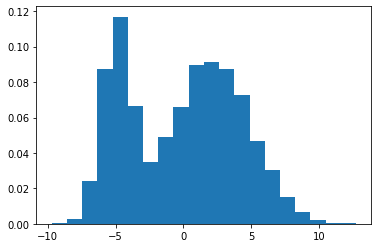

In [15]:
z = gmm.sample(10000)
_= plt.hist(z[0], bins=20, density=1)

After GMM learned about our input data set, it can generate artificial data based on what it knows. As we can see, the result is very, very similar

# Let's try this on titanic data

In [16]:
df = pd.read_csv("titanic.csv")

In [30]:
ages = np.array(df['Age'].dropna())

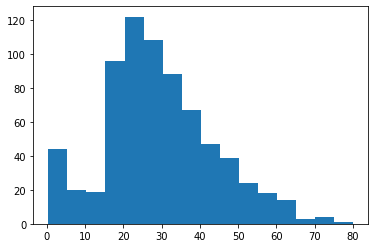

In [31]:
_= plt.hist(ages, bins=16)

In [32]:
gmm_t = mixture.GaussianMixture(n_components=2)
_= gmm_t.fit(ages.reshape(-1,1))

In [33]:
print(f"GMM Means: {gmm_t.means_}")
print(f"GMM Covariances: {gmm_t.covariances_}")
print(f"GMM Weights: {gmm_t.weights_}")

GMM Means: [[23.55423844]
 [43.30475489]]
GMM Covariances: [[[110.31858157]]

 [[164.31617867]]]
GMM Weights: [0.68887501 0.31112499]


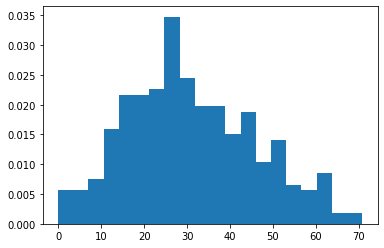

In [34]:
z_t = gmm_t.sample(300)
_= plt.hist(z_t[0], bins=20, density=1)

Pretty good, except it got the means pretty wrong, but that is because there is not a clear two peaks in the original age data

# Kernel Density Estimation
This is a non-parametric way to estimate the probability density function og a given data sample

In [62]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=.6)
_= kde.fit(x.reshape(-1,1))

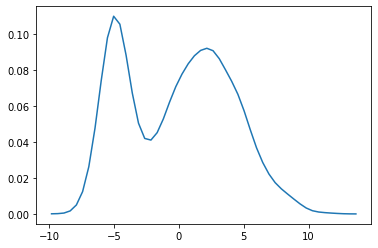

In [63]:
s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1, 1))
plt.plot(s, np.exp(log_pdf))

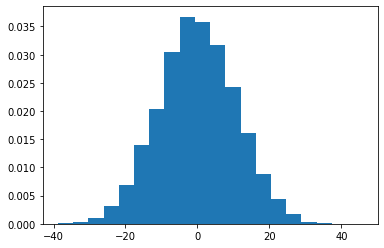

In [57]:
m = kde.sample(10000)
_= plt.hist(m, bins=20, density=1)

We can figure out what is the best bandwidth by using GridSearch, but more on that later. From what I can see, the smaller the bandwidth, more rough the outcome becomes, and the bigger, the more smooth that line is.

# Let's try this on titanic age dataset

In [86]:
df = pd.read_csv('titanic.csv')

In [89]:
ages = np.array(df['Age'].dropna())

In [96]:
kde = KernelDensity(kernel='gaussian', bandwidth=3)
_= kde.fit(ages.reshape(-1,1))

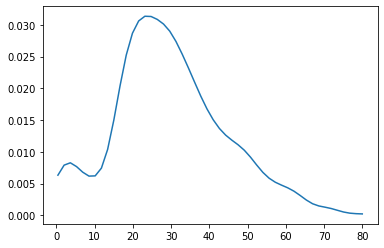

In [97]:
s = np.linspace(np.min(ages), np.max(ages))
log_pdf = kde.score_samples(s.reshape(-1, 1))
plt.plot(s, np.exp(log_pdf))

# Correlation
Correlation is used to test relationships between quantitative variables

Examples:
1. Your caloric intake and your weight
2. The amount of time you study and your GPA

Correlations are useful because we can find out what relationship variables have, we can make predictions about future behavior

### Try this on iris dataset

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df = df.drop(columns=['Id', 'Species'])

In [4]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


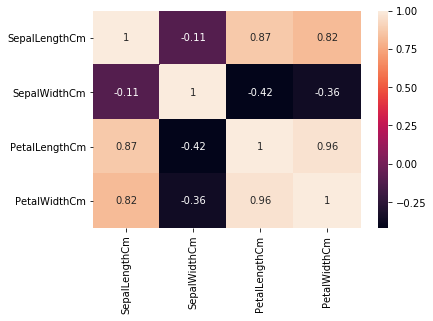

In [5]:
_= sns.heatmap(df.corr(), annot=True, xticklabels=df.columns, yticklabels=df.columns)

### Let's find the correlation value manually though

In [80]:
def pearson_corr(x, y):
    numerator = 0
    denominator = 0
    
    x_mean = x.mean()
    y_mean = y.mean()
    
    for i in range(0, len(x)):
        numerator += ((x[i]-x_mean)*(y[i]-y_mean))
    
    den_x = 0
    den_y = 0
    
    for i in x:
        den_x += pow(i-x_mean, 2)
    for i in y:
        den_y += pow(i-y_mean, 2)
    
    den_x = np.sqrt(den_x)
    den_y = np.sqrt(den_y)
    
    denominator = den_x * den_y
    
    return numerator/denominator

In [81]:
import scipy.stats as stats

In [116]:
df = pd.read_csv("iris.csv")

In [83]:
df[:2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [84]:
sepalLength = np.array(df['SepalLengthCm'])
petalLength = np.array(df['PetalLengthCm'])

In [85]:
print("Correlation between sepalLength and petalLength is: {}".format(pearson_corr(sepalLength, petalLength)))

Correlation between sepalLength and petalLength is: 0.8717541573048717


In [112]:
def fact(v):
    out = 1
    for i in range(0, v):
        out *= v-i
    return out

In [114]:
fact(10)/(fact(2)*fact(8))

45.0

## Getting custom pairs

In [117]:
df = pd.read_csv('iris.csv')

In [118]:
df = df.drop(columns=['Id', 'Species'])

In [122]:
def getPairs(x, y):
    pairs = []
    
    for i in range(0, len(x)):
        for j in range(i+1, len(y)):
            pairs.append((x[i], y[j]))
            
    return pairs        

In [128]:
pairs = getPairs(df.columns, df.columns)

In [129]:
pairs

[('SepalLengthCm', 'SepalWidthCm'),
 ('SepalLengthCm', 'PetalLengthCm'),
 ('SepalLengthCm', 'PetalWidthCm'),
 ('SepalWidthCm', 'PetalLengthCm'),
 ('SepalWidthCm', 'PetalWidthCm'),
 ('PetalLengthCm', 'PetalWidthCm')]

In [137]:
for i in pairs:
    in_0 = np.array(df[str(i[0])])
    in_1 = np.array(df[str(i[1])])
    print(f"Correlation between {i[0]} and {i[1]} is: {pearson_corr(in_0, in_1)}")

Correlation between SepalLengthCm and SepalWidthCm is: -0.10936924995064931
Correlation between SepalLengthCm and PetalLengthCm is: 0.8717541573048717
Correlation between SepalLengthCm and PetalWidthCm is: 0.8179536333691636
Correlation between SepalWidthCm and PetalLengthCm is: -0.4205160964011544
Correlation between SepalWidthCm and PetalWidthCm is: -0.3565440896138053
Correlation between PetalLengthCm and PetalWidthCm is: 0.9627570970509666
